In [1]:
import sqlite3 as sl
#from sklearn.neighbors import KernelDensity
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [2]:
dbfile = './web-application/database.db'
# Create a SQL connection to our SQLite database
con = sl.connect(dbfile)

# creating cursor
cur = con.cursor()
# reading all table names
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# here is you table list
print(table_list)

# Be sure to close the connection
# con.close()

[('users',), ('activeSessions',), ('messages',), ('psychologists',), ('psychologistSessions',), ('userConversations',), ('clicks',), ('playbacks',)]


In [8]:
userIds = [a[0] for a in cur.execute("SELECT * FROM clicks")]
timestamps = [a[1] for a in cur.execute("SELECT * FROM clicks")]
print(userIds)
print(timestamps)
datetime.strptime(timestamps[0], "%Y-%m-%dT%H:%M:%S.%fZ")


['b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'f874fe92-b190-496e-b12e-f6d8395e9503', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'ea43c33b-a737-474a-9389-b3b71564d3df', 'b4d4e615-06fb-4b70-b9c1-a51dfe59818d', 'f874fe92-b190-496e-b12e-f6d8395e9503',

datetime.datetime(2024, 2, 29, 15, 22, 4, 810000)

In [5]:
playbacks = [a[1] for a in cur.execute("SELECT * FROM playbacks")]
playbacks = [a for a in cur.execute("SELECT * FROM playbacks")]
print(playbacks)

[('1', '2024-02-29T15:20:40.290Z'), ('clipPlayer', '2024-03-01T20:23:51.956Z'), ('player2', '2024-03-01T20:23:53.323Z'), ('test-player', '2024-03-01T20:25:54.146Z'), ('player2', '2024-03-01T20:25:57.971Z'), ('clipPlayer', '2024-03-01T20:26:04.921Z'), ('clipPlayer', '2024-03-01T20:26:06.795Z'), ('test-player', '2024-03-01T20:27:43.025Z'), ('test-player', '2024-03-01T20:27:48.112Z'), ('player2', '2024-03-01T20:29:18.642Z'), ('test-player', '2024-03-01T20:32:00.157Z'), ('clipPlayer', '2024-03-01T20:32:03.491Z'), ('player2', '2024-03-01T20:32:06.892Z'), ('test-player', '2024-03-01T20:36:43.365Z'), ('player2', '2024-03-01T20:36:48.179Z'), ('clipPlayer', '2024-03-01T20:36:48.945Z'), ('test-player', '2024-03-01T20:36:50.483Z'), ('clipPlayer', '2024-03-01T20:36:51.304Z'), ('player5', '2024-03-01T20:38:39.711Z'), ('player7', '2024-03-01T20:38:43.493Z'), ('player19', '2024-03-01T20:38:48.692Z'), ('player18', '2024-03-01T20:38:50.308Z'), ('player19', '2024-03-01T20:38:51.614Z'), ('player18', '202

In [9]:
con.close()

In [10]:
datetime_objects = np.array([datetime.strptime(a, "%Y-%m-%dT%H:%M:%S.%fZ") for a in timestamps])
# Convert datetime objects to numerical values (e.g., timestamps)
numeric_values = np.array([dt.timestamp() for dt in datetime_objects])

In [10]:
# Example list of datetime objects
datetime_objects = [datetime(2024, 1, 1, 10, 30),
                    datetime(2024, 1, 2, 11, 0),
                    datetime(2024, 1, 3, 10, 45),
                    datetime(2024, 1, 4, 9, 15),
                    datetime(2024, 1, 5, 12, 0)]

# Convert datetime objects to numerical values (e.g., timestamps)
numeric_values = np.array([dt.timestamp() for dt in datetime_objects])

In [22]:
# Varying kernel size using different bw_method values
bw_methods = ['scott', 0.01, 0.1, 1.0, 10.0]  # Different bandwidths

# Perform KDE
kde = gaussian_kde(numeric_values)

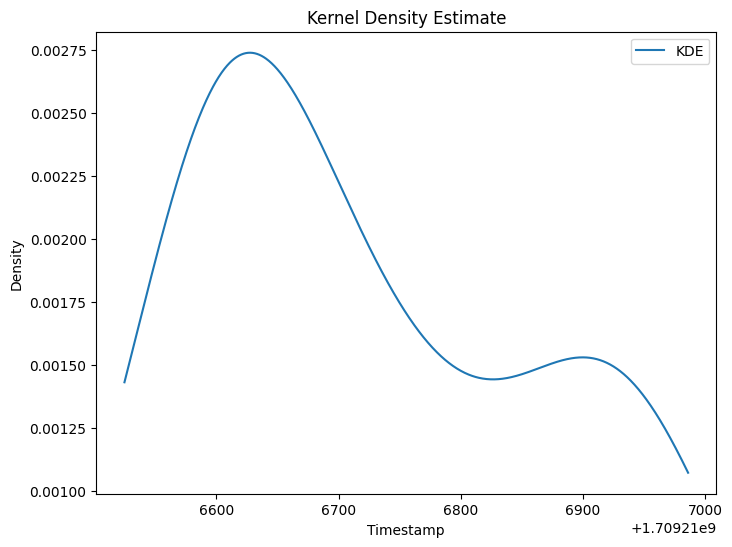

In [23]:
# Set up the range of values for which to estimate the density
x_values = np.linspace(min(numeric_values), max(numeric_values), 1000)

# Evaluate the KDE at the specified points
density_estimate = kde(x_values)

# Plotting the KDE
plt.figure(figsize=(8, 6))
plt.plot(x_values, density_estimate, label='KDE')
plt.xlabel('Timestamp')
plt.ylabel('Density')
plt.title('Kernel Density Estimate')
plt.legend()
plt.show()

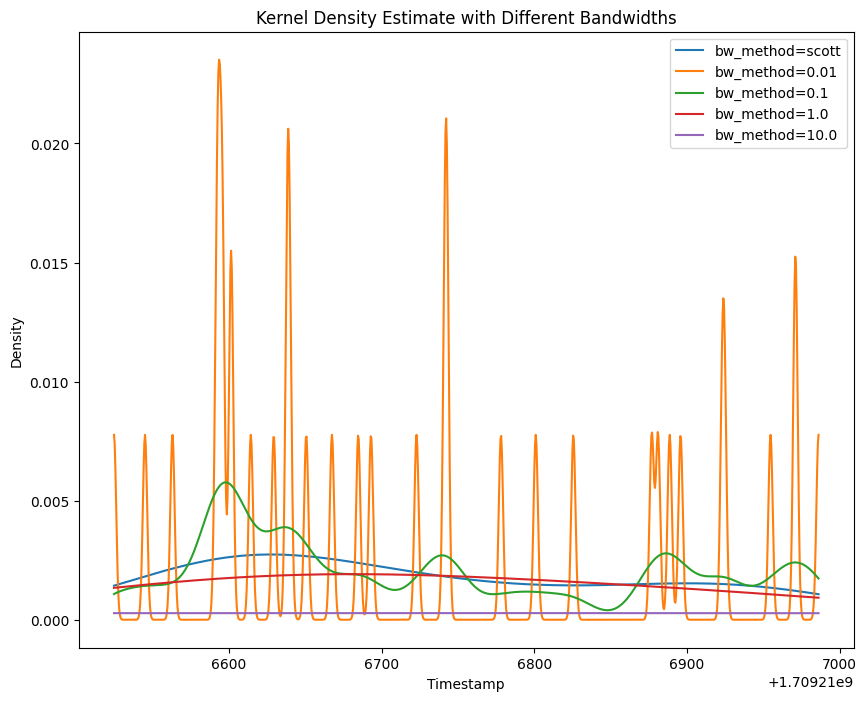

In [24]:
plt.figure(figsize=(10, 8))
for bw_method in bw_methods:
    kde = gaussian_kde(numeric_values, bw_method=bw_method)
    x_values = np.linspace(min(numeric_values), max(numeric_values), 1000)
    density_estimate = kde(x_values)
    plt.plot(x_values, density_estimate, label=f'bw_method={bw_method}')

plt.xlabel('Timestamp')
plt.ylabel('Density')
plt.title('Kernel Density Estimate with Different Bandwidths')
plt.legend()
plt.show()